# 🧠🤖 O Neurônio de McCulloch-Pitts 

<img src="_assets/001-mcp-neuron-model.png" width="640" />

Figura 1: Neurônio de McCulloch-Pitts 


## Definição

O neurônio de **McCulloch-Pitts (MCP)** (McCulloch and Pitts, 1943) foi o primeiro modelo matematico-computacional do neurônio biológico. 

Como ilustrado na Figura 1:

- Ele recebe $m$ valores de **entrada**, $\left[ x_1, x_2, ..., x_m \right]$ representando pulsos elétricos. 
- Estes sinais são multiplicados por $m$ **pesos**, $\left[ w_1, w_2, ..., w_m \right]$, que simulam a resistência elétrica das sinapses e modificam a quantidade do sinal que atualmente chega ao corpo do neurônio. 
- Se a soma ponderada das entradas for maior que um **limiar**, diz-se que o neurônio se ativou e a saída é definida como $1$. Caso contrário, a saída é definida como $0$.
- A função de limiar que gera a saída do neurônio a partir da soma ponderada das entradas é uma **função de ativação**. Como veremos ao longo do curso, existem outros tipos de função de ativação.
- Originalmente, os valores de entrada eram binários (0 ou 1) e os valores dos pesos eram -1 (sinapses inibitórias), 0 ou 1 (sinapses excitatórias).

**Importante**: O **limiar de ativação** é tipicamente chamado de **bias** e representado pela letra $b$. Vamos adotar esta notação deste ponto em diante.

Matematicamente, a operação realizada pelo neurônio MCP pode ser escrita como: 

$$
y(x_1, \dots, x_d) =
\begin{cases}
1,\text{ se } \sum_{i=1}^{m} w_i x_i >= b \\
0, \text{ caso contrário}
\end{cases}
$$


## Nomeclatura


Na área de Redes Neurais, é comum o uso de nomes diferentes para as mesmas coisas. 

**Neurônios artificiais**, por exemplo, também são chamados de:

- **Unidade (unit)**.
- **Nó (node)**.
- **Célula (cell)** – mais comum em redes recorrentes.
- **Unidade de processamento (processing unit)**.


## Atividades

### Atividade 1: Implementação do Neurônio de McCulloch-Pitts (MCP)

Implemente o construtor e o método forward na célula abaixo. 

- O construtor deve armazenar os pesos (lista de floats) e o bias (float) como atributos privados da classe.
- A função forward deve receber um vetor de entrada x (lista de floats) e retornar o valor de saída do neurônio (float, 0 ou 1). Adicione um assert para verificar se o tamanho da entrada é igual o tamanho da lista de pesos.

**Importante**: mesmo se você já conhece a biblioteca numpy, utilize listas do python neste exercício.

In [ ]:
# resposta:

class MCPNeuron:
    """McCulloch-Pitts Neuron model

    Simulates a biologic neuron using a set of weights and
    an activation threshold.

    """

    def __init__(self, weights: list[float], bias: float):
        self._weights = weights
        self._bias = bias

    def forward(self, x: list[float]):
        assert len(x) == len(self._weights), 'a entrada deve ser do mesmo tamanho do vetor de pesos'

        soma = 0
        for i in range(len(x)):
          soma += x[i] * self._weights[i]

        if soma >= self._bias:
          return 1
        else:
          return 0

1

In [ ]:
neuron = MCPNeuron(weights=[0.25, 0.5], bias=1)
neuron.forward([4, 0]) # resultado esperado = 1

### Atividade 2: Neurônios MCP como Operadores Lógicos

Código de preparação da atividade (não é necessário modificar).

In [3]:
import pandas as pd


def unary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        table.append([a, neuron.forward([a])])
    return pd.DataFrame(table, columns='a result'.split())


def binary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        for b in [0, 1]:
            table.append([a, b, neuron.forward([a, b])])
    return pd.DataFrame(table, columns='a b result'.split())



#### Atividade 2.1: Operador lógico AND

Crie um neurônio cujos pesos e bias implementem a função AND.

In [ ]:
# resposta:

neuron_and = MCPNeuron(weights=[1, 1], bias=2)

,a,b,result
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
# print the truth table for the logical operator AND
binary_truth_table(neuron_and)

#### Atividade 2.2: Operador lógico OR

Crie um neurônio cujos pesos e bias implementem a função OR.

In [ ]:
# resposta:

neuron_or = MCPNeuron(weights=[1, 1], bias=1)

,a,b,result
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
# print the truth table for the logical operator OR
binary_truth_table(neuron_or)

#### Atividade 2.3: Operador lógico NOT

Crie um neurônio cujos pesos e bias implementem a função NOT.

In [ ]:
# resposta:

neuron_not = MCPNeuron(weights=[-1], bias=0)

,a,result
0,0,1
1,1,0


In [ ]:
# print the truth table for the logical operator NOT
unary_truth_table(neuron_not)

#### Operador Lógico XOR

Tente criar um neurônio cujos pesos e bias implementem a função XOR.

In [7]:
# resposta:

#### Atividade 2.4: Operador And com n entradas

Use herança criar uma classe que herde de MCPNeuron e implemente a função And com n entradas.

In [ ]:
# resposta:

class GenericAnd(MCPNeuron):
    def __init__(self, n):
      _weights = [1 for _ in range(n)]
      super().__init__(weights=_weights, bias=n)

      def forward(self, x: list[float]):
          return self.forward(x)

In [11]:
n = 5
generic_and = GenericAnd(n)
generic_and.forward([1, 1, 1, 1, 0])  # esperado: 0

0.0

## O limiar de ativação (bias) como uma Entrada 

Podemos reescrever o critério de ativação do neurônio de forma que o pulso seja produzido sempre que a energia acumulada no corpo do neurônio for maior ou igual a 0. Para isto, vamos subtrair o valor do limiar dos dois lados da inequação:

$$
\sum_{i=1}^{m} w_i x_i >= b \implies \left[ \sum_{i=1}^{m} w_i x_i \right] - b >= 0
$$


Historicamente, alguns autores utilizam  $-b$ como o peso associado à uma entrada especial que é sempre $1$. Ao fazer isto, o limiar se torna um peso como os demais e o critério de ativação se torna:

$$
\sum_{i=0}^{m} w_i x_i >= 0, \text { onde } x_0 = 1 \text{ e } w_0 = -b
$$

Por isto, algumas figuras como a Figura 2, trazem o limiar como uma entrada especial do neurônio.



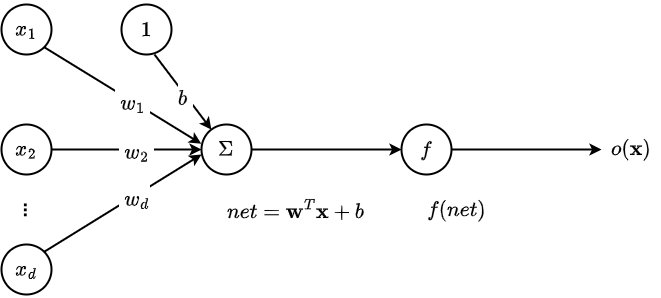

Figura 2: Neurônio MCP com Limiar (*bias*) sendo utilizado como peso associado à uma entrada com valor 1.

## Entradas e Pesos como Vetores

A **entrada** do neurônio MCP pode ser vista como um ponto ou vetor de números reais:
  
$$
\mathbf{x} = \begin{bmatrix} x_1\\ \vdots\\ x_d \end{bmatrix}.
$$

Da mesma forma, os **pesos** também podem ser organizados em um vetor: 

$$
\mathbf{w} = \begin{bmatrix} w_1\\ \vdots\\ w_d \end{bmatrix}.
$$

Observe que a soma ponderada das entradas equivale ao produto escalar (produto interno no espaço Euclidiano) entre estes vetores. 

$$
\mathbf{w} \cdot \mathbf{x} = \sum_{i=1}^{m} w_i x_i
$$

Como o valor do limiar é escolhido pelo usuário, o sinal da operação (soma ou subtração) não é relevante. A expressão $a-b$ com $b=10$ é equivalente à operação $a+b$ com $b=-10$. A convenção da literatura é utilizar a operação de soma. Assim, utilizando a notação matricial, a operação realizada pelo neurônio pode ser reescrita como:

$$
y(\mathbf{x}) =
\begin{cases}
1,\text{ se } \mathbf{w}^T \mathbf{x} + b >= 0 \\
0, \text{ caso contrário}
\end{cases}
$$

Esta representação é a que será encontrada com mais frequência em livros de redes neurais.


## O Neurônio MCP como um Classificador

Apesar de simples, o neurônio MCP pode ser visto como um classificador. 

Para mostrar como isso pode ser feito, vamos utilizar um conjunto de dados de exemplo apresentado abaixo. 

O conjunto de dados é composto por um conjunto pontos com coordenadas $(x_1, x_2)$, cada um podendo ser ou da classe $0$ ou da classe $1$.

In [ ]:

import numpy as np
import pandas as pd

df = pd.DataFrame([[3.5, 4.25, 1],
     [4, 3, 1],
     [4, 4, 1],
     [4.5, 1.75, 1],
     [4.9, 4.5, 1],
     [5, 4, 1],
     [5.5, 2.5, 1],
     [5.5, 3.5, 1],
     [0.5, 1.5, 0],
     [1, 2.5, 0],
     [1.25, 0.5, 0],
     [1.5, 1.5, 0],
     [2, 2, 0],
     [2.5, 0.75, 0]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,3.50,4.25,1
1,4.00,3.00,1
2,4.00,4.00,1
3,4.50,1.75,1
4,4.90,4.50,1
5,5.00,4.00,1
6,5.50,2.50,1
7,5.50,3.50,1
8,0.50,1.50,0
9,1.00,2.50,0


Os elementos do conjunto de dados e as respectivas classes podem ser visualizados na Figura abaixo.

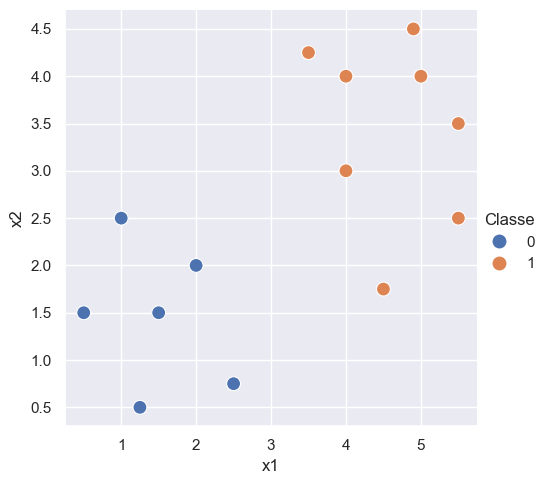

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100); # o ponto e vírgulo previne a geração de outputs

Considere que as coordenadas dos pontos serão utilizadas como entrada para o neurônio MCP. 

Vamos definir os parâmetros do neurônio como $\mathbf{w} = [ 2.9, 1.0 ]$ e $b = 10$.

**Lembrete**: Na nossa implementação, b é utilizado como um limiar de ativação, isto é, a saída será $1$ se a soma ponderada das entradas for maior que $10$.

Abaixo, criamos um neurônio para atuar como classificador e o utilizamos para predizer as classes de todos os elementos do conjunto de dados. As classes preditss foram adicionadas ao ``DataFrame`` original dos dados. Como pode ser observado, o neurônio foi capaz de classificar corretamente todos elementos do conjunto de dados.

In [14]:
classifier = MCPNeuron(weights=[2.9, 1.0], bias=10)

y_pred = [classifier.forward(x) for x in df[['x1', 'x2']].values]
df['Classe Predita'] = y_pred
df

,x1,x2,Classe,Classe Predita
0,3.50,4.25,1,1.0
1,4.00,3.00,1,1.0
2,4.00,4.00,1,1.0
3,4.50,1.75,1,1.0
4,4.90,4.50,1,1.0
5,5.00,4.00,1,1.0
6,5.50,2.50,1,1.0
7,5.50,3.50,1,1.0
8,0.50,1.50,0,0.0
9,1.00,2.50,0,0.0


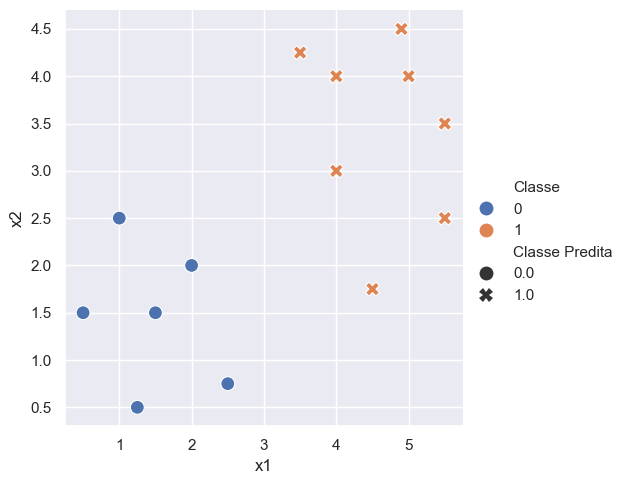

In [15]:
#@title
sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', style = 'Classe Predita', s = 100);

## Atividade: Avaliando a Performance do Classificador usando a Acurácia

Implemente uma função para calcular a acurácia. Esta métrica é dada pelo percentual de amostras classificadas corretamente. Ela é obtida dividindo o número de itens em que a classe predita é igual à esperada pelo número total de amostras. 

Adicione asserts para verificar se os tamanhos das listas de entrada são iguais e se estes tamanhos são maiores que zero.

In [ ]:
# resposta:

def accuracy_metric(expected, predicted):
    correct = sum(1 for e, p in zip(expected, predicted) if e == p)
    return correct / len(expected)

In [17]:
expected = df['Classe'].values
predicted = df['Classe Predita'].values

accuracy_metric(expected, predicted)

1.0

## O Neurônio MCP é capaz de Resolver apenas Problemas Linearmente Separáveis

A Figura a seguir apresenta as regiões de decisão do classificador. Qualquer elemento/ponto que esteja na área azul claro será classificado como pertencente à classe $0$. Analogamente, pontos na região vermelho claro serão classificados como sendo da classe $1$.

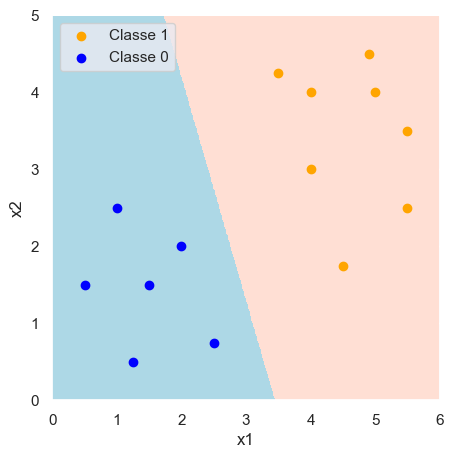

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def draw_classification_region(data: pd.DataFrame, classifier: MCPNeuron):
    cmap_light = ListedColormap(['#ADD8E6', '#AAFFAA', '#ffdfd4'])

    h = .01

    x_min = data['x1'].min() - 0.5
    x_max = data['x1'].max() + 0.5
    y_min = data['x2'].min() - 0.5
    y_max = data['x2'].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    f, axs = plt.subplots(1, 1, figsize=(5, 5))

    Z = np.array([classifier.forward([x1, x2]) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    axs.pcolormesh(xx, yy, Z, cmap = cmap_light, shading = 'auto')

    axs.scatter(df[df['Classe'] == 1]['x1'], df[df['Classe'] == 1]['x2'], color = 'orange', label = 'Classe 1')
    axs.scatter(df[df['Classe'] == 0]['x1'], df[df['Classe'] == 0]['x2'], color = 'blue', label = 'Classe 0')

    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max))
    plt.legend(loc = 'best');


draw_classification_region(df, classifier)


Como pode ser visto, o neurônio MCP é um classificador linear, ou seja, as regiões de decisão são delimitadas por uma função linear.

Isto faz sentido quando observamos que $\mathbf{w}^T \mathbf{x} + b$ lembra a fórmula utilizada para representar hiperplanos (retas em 2D, planos em 3D, etc.). Em particular, o hiperplano definido por $\mathbf{w}^T \mathbf{x} + b = 0$ é a fronteira de decisão do classificador (a reta de separação na figura acima). Analisando a operação do neurônio como uma operação linear, percebemos que o vetor $\mathbf{w}$ define a inclinação do hiperplano e $b$ define o deslocamento do hiperplano em relação à origem.

Concluímos, assim, que **o neurônio MCP é capaz de resolver bem apenas problemas linearmente separáveis**, isto é, aqueles em que a maioria dos dados de classes diferentes podem ser separados por um hiperplano. Infelizmente, a maioria dos problemas interessantes não são linearmente separáveis e redes neurais mais complexas são necessárias para atacar estes problemas. 





### Exemplo Ilustrativo

Para ilustrar esta limitação, o conjunto de dados abaixo simula uma versão *soft* da porta lógica `XOR` em que valores próximos a $(0, 0)$ e $(1, 1)$ devem receber valor $0$ e valores próximos a $(0, 1)$ ou $(1, 0)$ devem receber valor $1$.


In [19]:
#@title

import numpy as np
import pandas as pd

df = pd.DataFrame(
    [[0.84, 0.67, 0],
     [0.67, 0.84, 0],
     [1.00, 1.00, 0],
     [0.17, 0.33, 0],
     [0.33, 0.17, 0],
     [0.00, 0.00, 0],
     [0.84, 0.33, 1],
     [0.67, 0.17, 1],
     [1.00, 0.00, 1],
     [0.17, 0.67, 1],
     [0.33, 0.84, 1],
     [0.00, 1.00, 1]], columns = 'x1 x2 Classe'.split())

df

,x1,x2,Classe
0,0.84,0.67,0
1,0.67,0.84,0
2,1.00,1.00,0
3,0.17,0.33,0
4,0.33,0.17,0
5,0.00,0.00,0
6,0.84,0.33,1
7,0.67,0.17,1
8,1.00,0.00,1
9,0.17,0.67,1


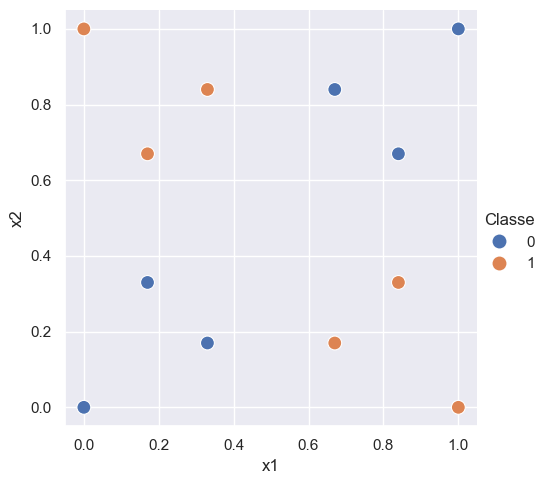

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.relplot(data = df, x = 'x1', y = 'x2', hue = 'Classe', s = 100);

Veja que elementos do primeiro e terceiro quadrantes (onde $x_1$ e $x_2$ possuem o mesmo sinal) pertencem à classe $1$. Já os elementos dos quadrantes dois e quatro (onde $x_1$ e $x_2$ possuem sinais opostos) pertencem à classe $0$. Apesar de ter um padrão claro e simples, não é possível discriminar os pontos de acordo com as duas classes utilizando um neurônio MCP.

Faça o teste! Tente encontrar uma reta que permita separar os pontos de classes diferentes em duas regiões do espaço.


### Visualização do Hiperplano de Decisão

A célula abaixo demonstra como visualizar o plano definido pelos parâmetros do neurônio MCP. 

Para ganhar intuição geométrica dos efeitos de modificar os parâmetros do neurônio, brinque com os valores na última linha e execute a célula novamente para verificar o efeito no plano.


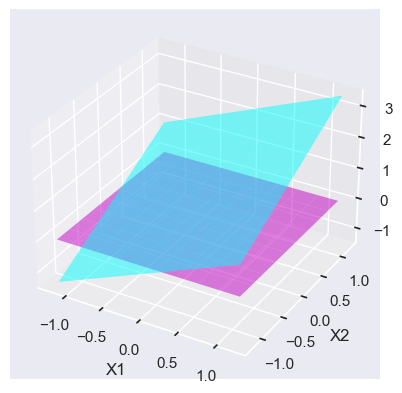

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_plane(w1, w2, bias, x1_range=(-1.2, 1.2), x2_range=(-1.2, 1.2)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create grid
    x1 = np.linspace(*x1_range, 10)
    x2 = np.linspace(*x2_range, 10)
    X1, X2 = np.meshgrid(x1, x2)
    Z = w1 * X1 + w2 * X2 + bias
    Z2 = 0 * X1 + 0 * X2 + 0

    # Plot the surface
    ax.plot_surface(X1, X2, Z, alpha=0.5, rstride=1,
                    cstride=1, color='cyan', edgecolor='none')
    ax.plot_surface(X1, X2, Z2, alpha=0.5, rstride=1,
                    cstride=1, color='magenta', edgecolor='none')

    # Set labels
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Z')

    plt.show()

# Modifique os valores abaixo e verifique como o plano é afetado
plot_plane(w1=1, w2=1, bias=1)

## Atividade: "Treinando" o Classificador Manualmente

Crie um objeto do tipo MCPNeuron no local indicado e inicialize pesos e bias de forma a maximizar a performance do classificador. 

O treinamento do modelo é o ajuste dos parâmetros (pesos e bias). Neste exemplo, estamos fazendo isto manualmente e nas próximas aulas aprenderemos como fazer isto automaticamente.

A célula abaixo cria uma base de dados, classifica as amostras, desenha a região de classificação e mostra a acurácia na tela.

>> Accuracy:  0.85


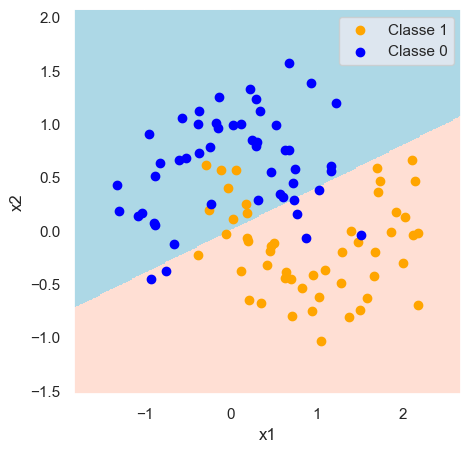

In [ ]:
# resposta:

# imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# cria o dataset
x, y = make_moons(noise=0.3, random_state=0)
data = np.concat([x, np.expand_dims(y, axis=1)], axis=1)
df = pd.DataFrame(data, columns = 'x1 x2 Classe'.split())

# define o classificador

##########################
# ADICIONE A RESPOSTA ABAIXO
##########################
classifier = MCPNeuron(weights=[0.5, -1], bias=-0.1)

# desenha as regicoes de classificacao
draw_classification_region(df, classifier)

# calcula a metrica
predicted = [classifier.forward(sample) for sample in x]
print(">> Accuracy: ", accuracy_metric(expected=y, predicted=predicted))

## Referências

- Machine Learning, Tom Mitchell, McGraw Hill, 1997.

- McCulloch and Pitts: A logical calculus of the ideas immanent in nervous activity. Bulletin of Mathematical Biophysics, 1943.

- Rosenblatt: The perceptron - a probabilistic model for information storage and organization in the brain. Psychological Review, 1958.

- Minsky and Papert: Perceptrons: An introduction to computational geometry. MIT Press, 1969.

- Mohammed J. Zaki, Wagner Meira, Jr., Data Mining and Machine Learning: Fundamental Concepts and Algorithms, 2nd Edition, Cambridge University Press, March 2020.